In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
def Aerofoil(x):
    '''This function takes the x coordinate and returns the positive y coordinate of the aerofoil'''
    t=0.2
    y = (5*t)*((0.2969*x**0.5)-(0.1260*x)-(0.3516*x**2)+(0.2843*x**3)-(0.1015*x**4))
    return(y)

In [3]:
temp_c = 20
pressure = 102300
temp_k = 273+temp_c
constant = 287
rho=pressure/(constant * temp_k)

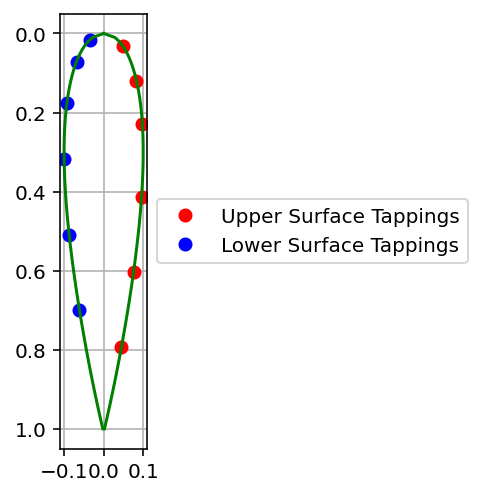

In [4]:
#This is set up so if the aerofoil is turned clockwise the upper surface with have the tapping positons below otherwise
#just switch upper and lower surface around
x = [1, 2, 4.5, 7.5, 11, 14.5, 20, 26, 32.1, 38, 44, 50]
xc_upper= []
xc_lower =[]
for i in range(12):
    if i % 2 == 0:
        xc_lower.append(x[i]/63)
    if i % 2 == 1:
        xc_upper.append(x[i]/63)
        
plt.plot([Aerofoil(i) for i in xc_upper], xc_upper, 'ro', label= 'Upper Surface Tappings')
plt.plot([Aerofoil(i) for i in np.linspace(0,1,100)], np.linspace(0,1,100), 'g-')
plt.plot([-Aerofoil(i) for i in xc_lower], xc_lower, 'bo', label = 'Lower Surface Tappings')
plt.plot([-Aerofoil(i) for i in np.linspace(0,1,100)], np.linspace(0,1,100), 'g-')
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.axis('scaled')
plt.show()

positions_upper = [0.0159, 0.0714, 0.175, 0.317, 0.510, 0.698]
positions_lower = [0.0317, 0.1190, 0.230, 0.413, 0.603, 0.794]

# starting analysis

In [27]:
def U_inf(readings, rho):
    """
    finds the free stream velocity by the total and static pressures
    """
    top = 2 * (readings[0]-readings[1])
    frac = top / rho
    return np.sqrt(frac)

def c_p(pressure, readings, rho):
    """
    finds the pressure coefficient from the total, static and measured pressures
    """
    top = pressure - readings[1]
    bottom = 0.5 * rho * (U_inf(readings, rho)**2)
    return top / bottom

def interpolate_both(readings):
    """
    intepolates both of the arrays
    """
    upper = readings[2:8]
    lower = readings[8:]
    
    upper_interp = np.interp(np.linspace(0,1,100), positions_upper, upper)
    lower_interp = np.interp(np.linspace(0,1,100), positions_lower, lower)
    
    upper_cp = np.array([c_p(value, readings, rho) for value in upper_interp])
    lower_cp = np.array([c_p(value, readings, rho) for value in lower_interp])
    
    return upper_interp, lower_interp, upper_cp, lower_cp

def c_l(alpha):
    """
    calculates the cl when given the alpha in the filename to work with
    """
    filename = f"{alpha}_deg.csv"
    first = pd.read_csv(filename)
    a, b = first.columns
    pressures = pressure_from_readings(first[b])
    upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)

    x = np.linspace(0,1,100)
    grad_foil = np.gradient(Aerofoil(x), x)
    
    C_N = -np.trapz((lower_cp - upper_cp), x) # force normal to the airfoil
    
    C_T = np.trapz(((upper_cp + lower_cp) * grad_foil), x)

    return C_N * np.cos(np.radians(alpha)) - C_T * np.sin(np.radians(alpha))

def c_d(alpha):
    """
    calculates the cl when given the alpha in the filename to work with
    """
    filename = f"{alpha}_deg.csv"
    first = pd.read_csv(filename)
    a, b = first.columns
    pressures = pressure_from_readings(first[b])
    upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)

    x = np.linspace(0,1,100)
    grad_foil = np.gradient(Aerofoil(x), x)
    
    C_N = -np.trapz((lower_cp - upper_cp), x) # force normal to the airfoil
    
    C_T = np.trapz(((upper_cp + lower_cp) * grad_foil), x)

    return C_N * np.sin(np.radians(alpha)) + C_T * np.cos(np.radians(alpha))

def natplotlib(x, y, label):
    """
    takes in 2 arrays consisting of [data, axis label]. There is also a label for the line
    """
    
    plt.axhline(linewidth=1.5, color="grey")        
    plt.axvline(linewidth=1.5, color="grey")
    plt.plot(x[0], y[0], label=label)
    plt.grid()
    plt.legend()
    plt.xlabel(x[1])
    plt.ylabel(y[1])

def pressure_from_readings(readings, rho=rho, g=9.81):
    return [reading*rho*g for reading in readings]

def pressure_distribution(a):
    filename = f"{a}_deg.csv"
    first = pd.read_csv(filename)
    c, b = first.columns
    pressures = pressure_from_readings(first[b])
    upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)
    return upper_cp, lower_cp

the cell below gives graphs of the pressure distrobution of each foil, along with their $c_l$

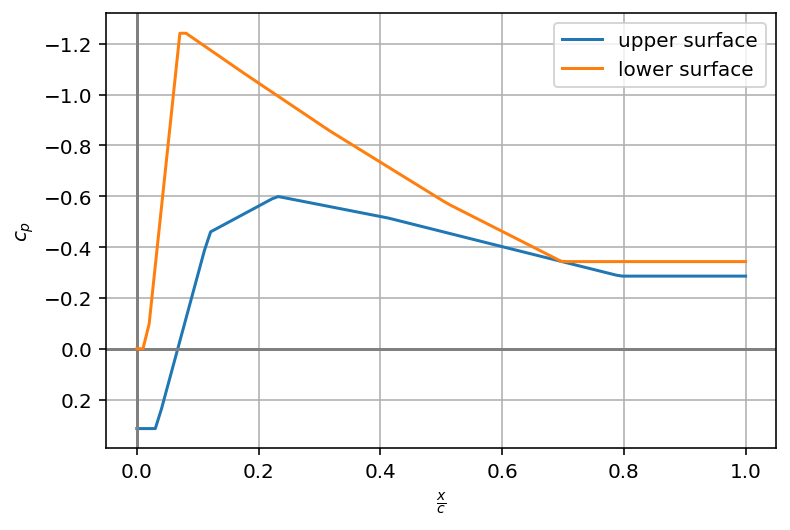

c_l of -0.2511783676115555, alpha of -4


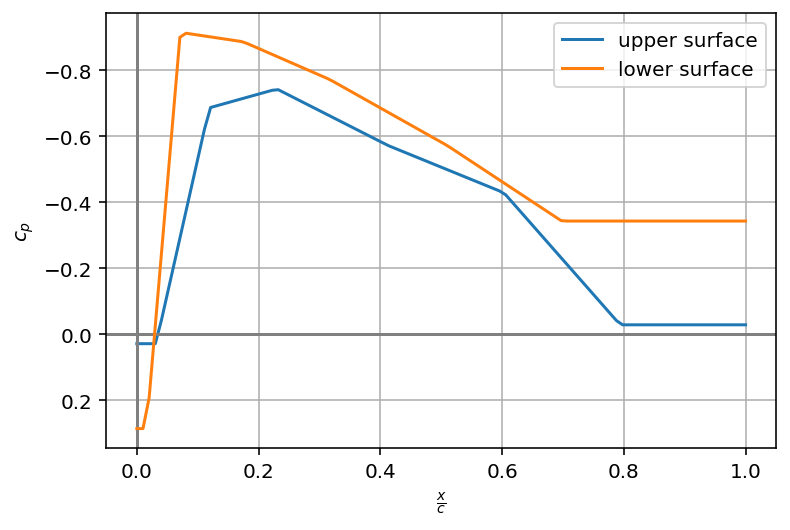

c_l of -0.1705793656363674, alpha of -2


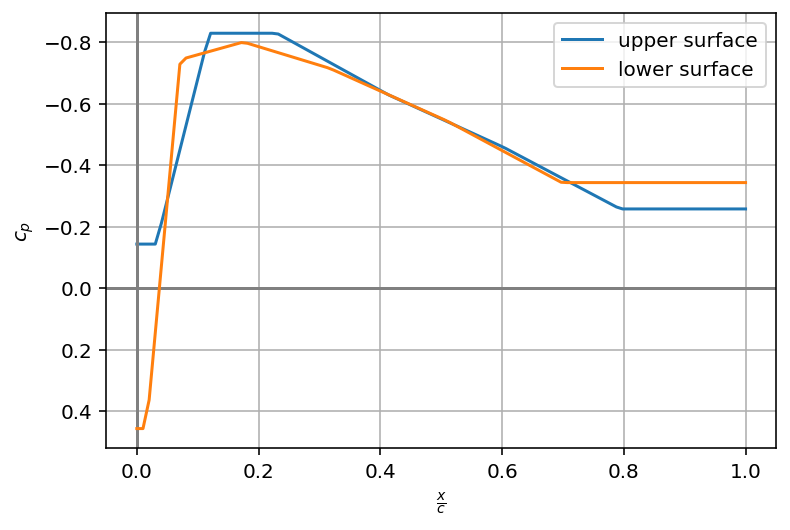

c_l of 0.00014554489704013038, alpha of 0


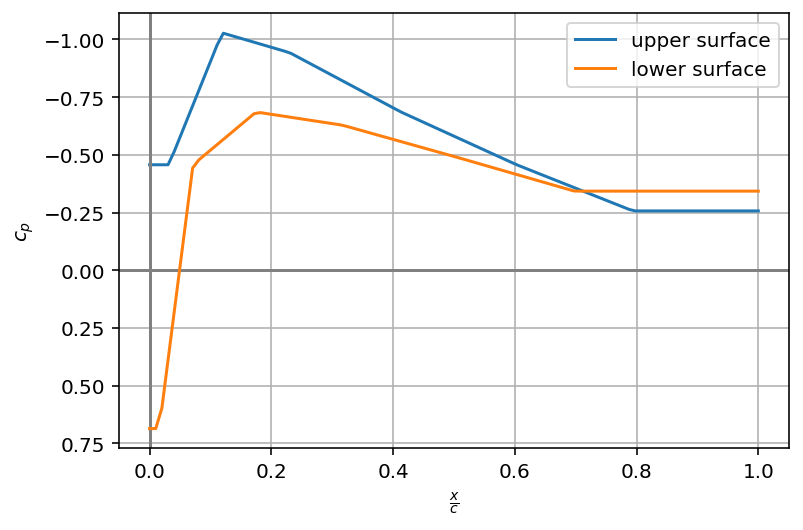

c_l of 0.1422056165536396, alpha of 2


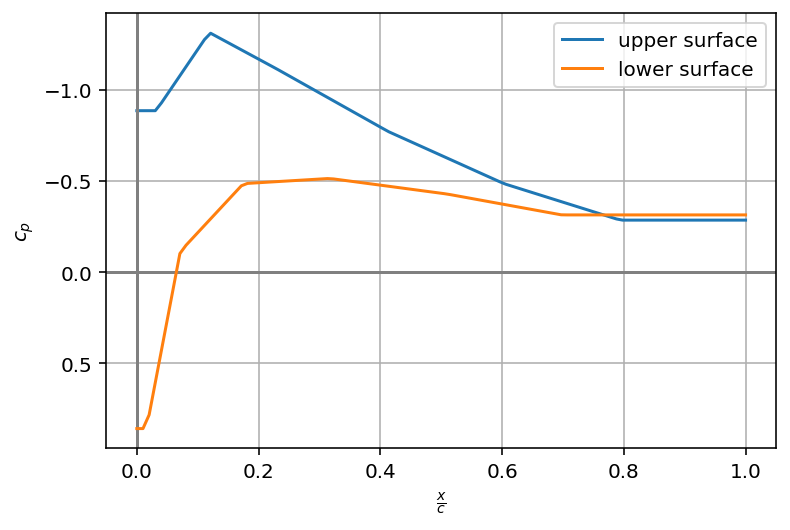

c_l of 0.35822103454581866, alpha of 4


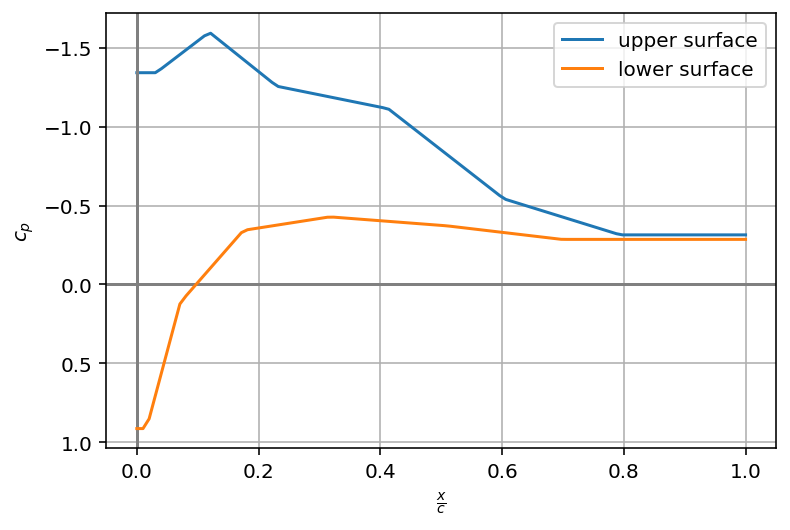

c_l of 0.6000026038830882, alpha of 6


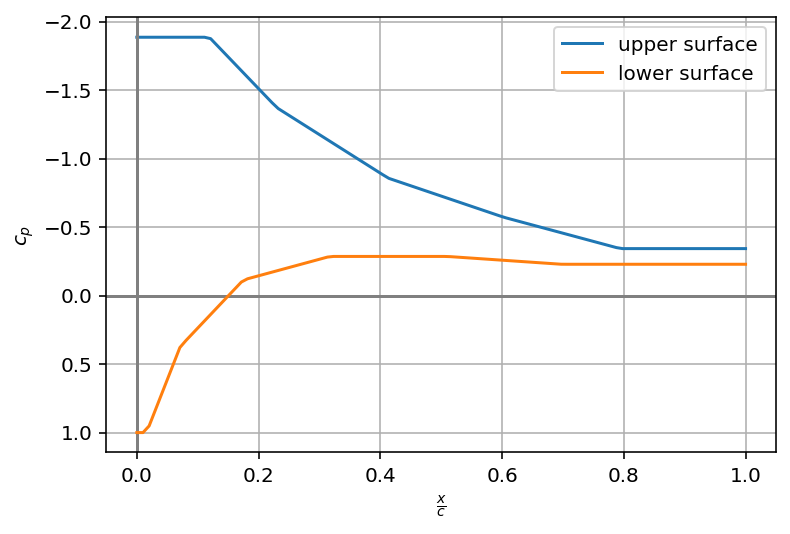

c_l of 0.7686831857569674, alpha of 8


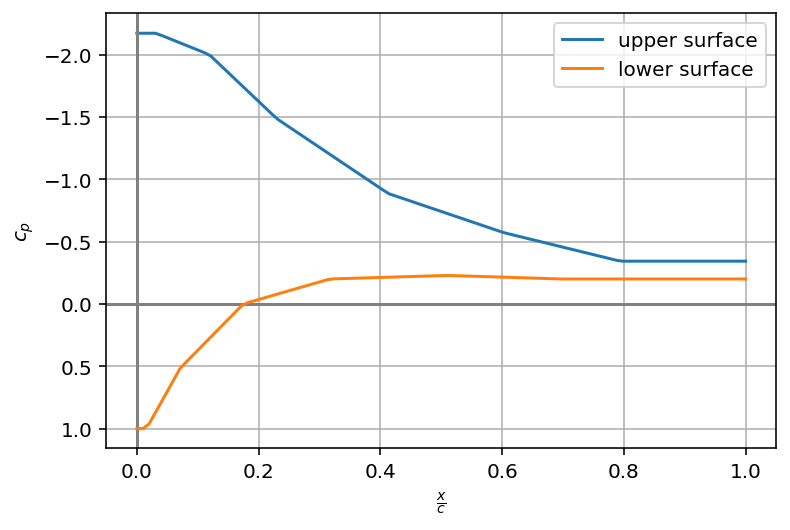

c_l of 0.8849876037260522, alpha of 10


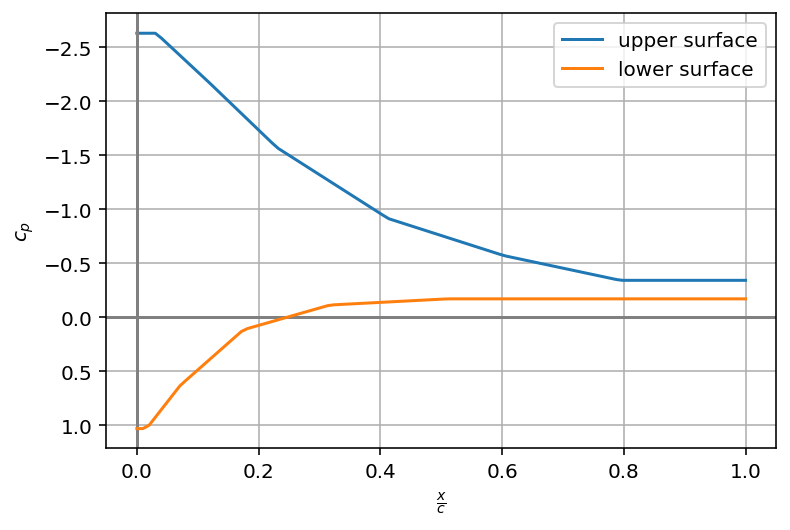

c_l of 1.0157854977675551, alpha of 12


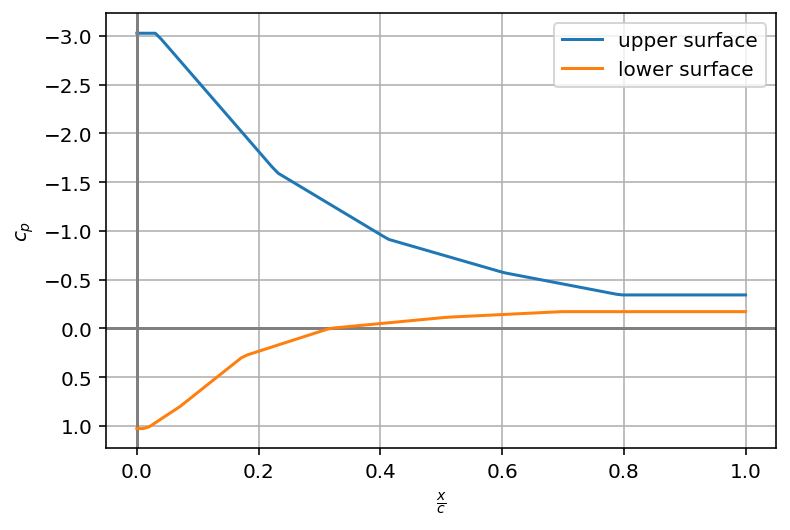

c_l of 1.1360093978299544, alpha of 14


In [6]:
alphas = np.array([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14])

for a in alphas:
    filename = f"{a}_deg.csv"
    cl = c_l(a)
    first = pd.read_csv(filename)
    c, b = first.columns
    pressures = pressure_from_readings(first[b])
    upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)
    plt.figure()
    x=np.linspace(0, 1, 100)
    
    plt.plot(x, lower_cp, label = "upper surface")
    natplotlib([x, r"$\frac{x}{c}$"], [upper_cp, r"$c_p$"],"lower surface")

    
    plt.gca().invert_yaxis()
    plt.show()
    print(f"c_l of {cl}, alpha of {a}")

the cell below shows the lift curve slope

gradient of the lift curve slope is 0.3190750176847387


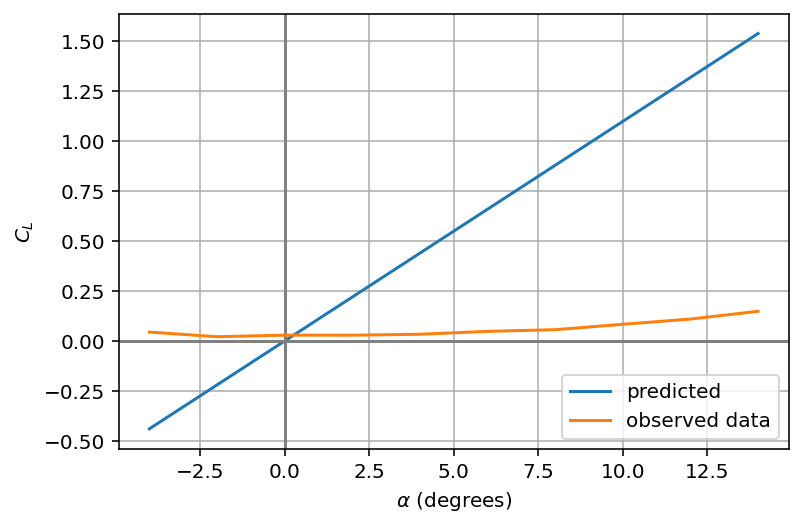

In [31]:
alphas = np.array([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14])
alphas_r = np.radians(alphas)
cls = [c_d(a) for a in alphas]


plt.plot(alphas, [np.radians(a)*2*np.pi for a in alphas], label = "predicted")
natplotlib([alphas, r"$\alpha$ (degrees)"], [cls, r"$C_L$"], "observed data")

max_i = 10

gradient = np.mean(np.gradient(cls[:max_i],alphas_r[:max_i]))
print(f"gradient of the lift curve slope is {gradient}")

$\frac{dc_l}{d\alpha}$ seems a bit low because thin airfoil theory states that $c_l = 2\pi\alpha$

110049.30925869581

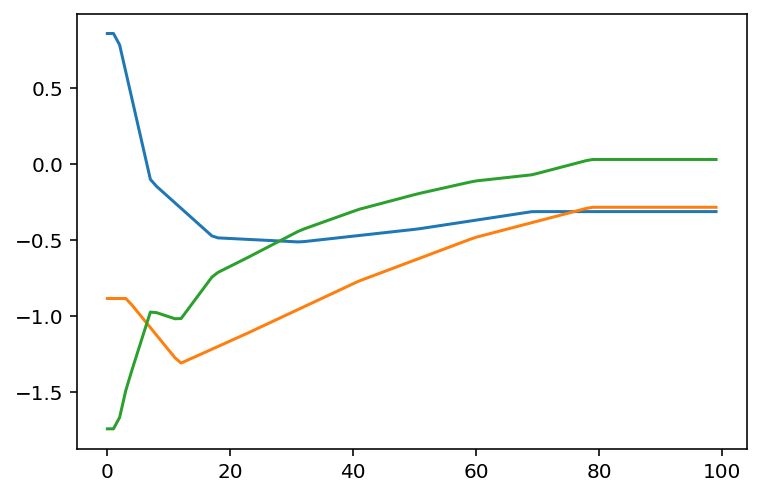

In [21]:
filename = "4_deg.csv"
first = pd.read_csv(filename)
a, b = first.columns

pressures = pressure_from_readings(first[b])

upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)
plt.plot(upper_cp)
plt.plot(lower_cp)
plt.plot(lower_cp - upper_cp)
upper_cp
u=U_inf(pressures, rho)

def find_re(u, c, nu):
    return u*c/nu

find_re(u, 0.063, (1.825e-5)/rho)

In [ ]:
c_l(-2)+c_l(2)

In [26]:
c_l(12)

1.0157854977675551

In [ ]:
c_l(-4) + c_l(4)

In [ ]:
a, b = pressure_distribution(8)
plt.plot(a)
plt.plot(b)

In [35]:
cds = [c_d(i) for i in alphas]


In [41]:
cls = np.array([c_l(i) for i in alphas])
cds = np.array([c_d(i) for i in alphas])
ratio = cls/cds

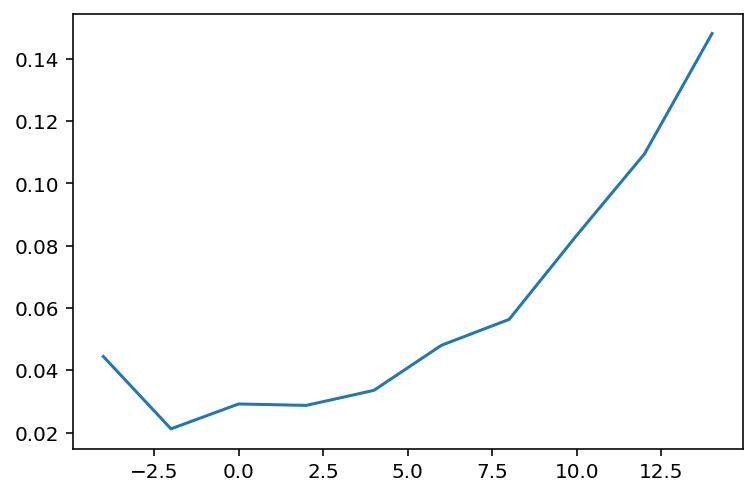

In [46]:
plt.plot(alphas, cds)

In [44]:
cds

array([0.0444302 , 0.02120715, 0.02918834, 0.02872818, 0.03355758,
       0.04803182, 0.05633443, 0.08334927, 0.10942717, 0.14808899])

In [45]:
cls

array([-2.51178368e-01, -1.70579366e-01,  1.45544897e-04,  1.42205617e-01,
        3.58221035e-01,  6.00002604e-01,  7.68683186e-01,  8.84987604e-01,
        1.01578550e+00,  1.13600940e+00])

In [59]:
filename = f"12_deg.csv"
first=pd.read_csv(filename)
c, b = first.columns
pressures = pressure_from_readings(first[b])
upper_interp, lower_interp, upper_cp, lower_cp = interpolate_both(pressures)

upper_cp, lower_cp

(array([ 1.02857143,  1.02857143,  0.99756588,  0.9247658 ,  0.85196573,
         0.77916566,  0.70636559,  0.63356551,  0.58186832,  0.53172542,
         0.48158251,  0.4314396 ,  0.3812967 ,  0.33115379,  0.28101088,
         0.23086797,  0.18072507,  0.13058216,  0.10331077,  0.0870516 ,
         0.07079243,  0.05453326,  0.03827409,  0.02201492,  0.00575575,
        -0.01050342, -0.0267626 , -0.04302177, -0.05928094, -0.07554011,
        -0.09179928, -0.10805845, -0.11613096, -0.11912164, -0.12211231,
        -0.12510299, -0.12809367, -0.13108434, -0.13407502, -0.1370657 ,
        -0.14005637, -0.14304705, -0.14603773, -0.1490284 , -0.15201908,
        -0.15500976, -0.15800043, -0.16099111, -0.16398179, -0.16697246,
        -0.16996314, -0.17142857, -0.17142857, -0.17142857, -0.17142857,
        -0.17142857, -0.17142857, -0.17142857, -0.17142857, -0.17142857,
        -0.17142857, -0.17142857, -0.17142857, -0.17142857, -0.17142857,
        -0.17142857, -0.17142857, -0.17142857, -0.1